# Aula 1

In [1]:
import pandas as pd
notas= pd.read_csv('ratings.csv')

In [2]:
notas.head() # primeiras 5 linhas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.columns= ['usuarioId', 'filmeId', 'nota', 'momento'] # renomeação de colunas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'] # série de dados e não mais dataframe

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [5]:
notas['nota'].unique() # Apenas valores únicos

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts() # Contagem de valores e sinalizaçõo de ocorrências

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

# Aula 2

In [7]:
notas.nota # Outra forma de acessar determinada coluna

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

<AxesSubplot:>

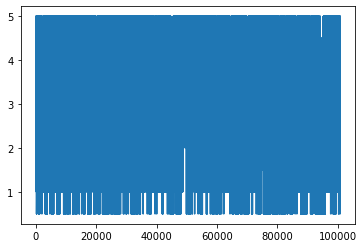

In [8]:
notas.nota.plot() # Gráfico de linha

<AxesSubplot:ylabel='Frequency'>

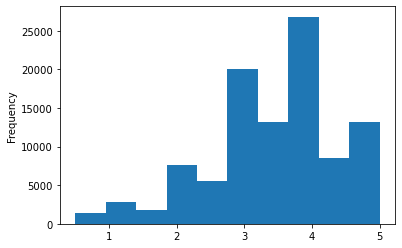

In [9]:
notas.nota.plot(kind='hist') # Plotagem na forma histograma

In [10]:
print(notas.nota.mean())  # Média das notas
print(notas.nota.median()) # Divisor de quantidade

3.501556983616962
3.5


In [11]:
notas.nota.describe() # Visualização de informações estatísticas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

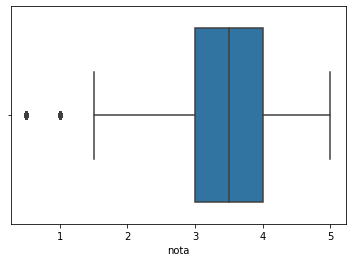

In [12]:
import seaborn as sns
sns.boxplot(notas.nota) # Gráfico de caixa do seaborn

50% das notas está entre 3 e 4 e notas abaixo de 1.5 são raramente dadas

# Aula 3

In [13]:
filmes= pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
filmes.columns= ['filmeId', 'titulo', 'genero'] # Alteração dos nomes das colunas
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Analisando notas por alguns filmes

In [15]:
notas.query('filmeId==1').nota.mean() # Vemos que a média para o filmeId1 é maior que a média geral

3.9209302325581397

In [16]:
notas.query('filmeId==2').nota.mean() # Vemos que aqui a média é menor que a geral

3.4318181818181817

In [17]:
notas.groupby('filmeId').mean() # Agrupa tudo por 'filmeId' e tira a média resultado: média por filme

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Como não faz sentido utilizar as médias de ids ou momentos, iremos aplicar apenas para a coluna 'nota'

In [18]:
medias_por_filmes= notas.groupby('filmeId').mean().nota # Médias por filme

<AxesSubplot:ylabel='Frequency'>

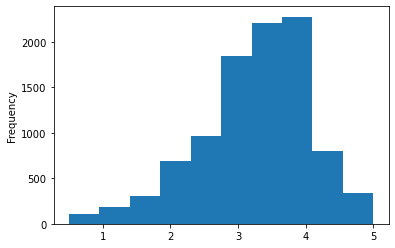

In [19]:
medias_por_filmes.plot(kind='hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

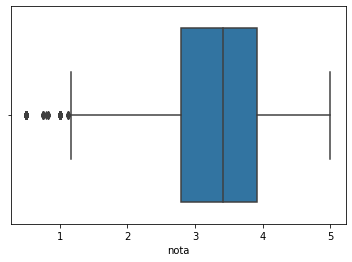

In [20]:
sns.boxplot(medias_por_filmes)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

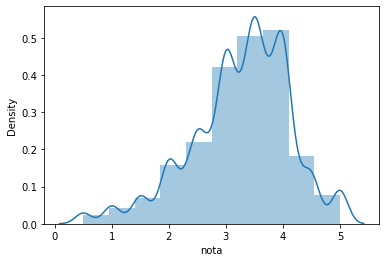

In [21]:
sns.distplot(medias_por_filmes, bins= 10) # Histograma pelo seaborn
# parâmetro bins é a quantidade de divisões que o sns usará

Text(0.5, 1.0, 'Histograma das médias dos filmes')

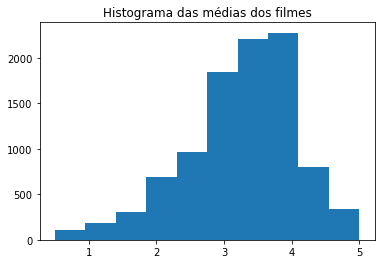

In [22]:
import matplotlib.pyplot as plt # Biblioteca mais baixo nível (utilizada por sns e pd)
plt.hist(medias_por_filmes)
plt.title('Histograma das médias dos filmes') # Adição de título

<AxesSubplot:ylabel='nota'>

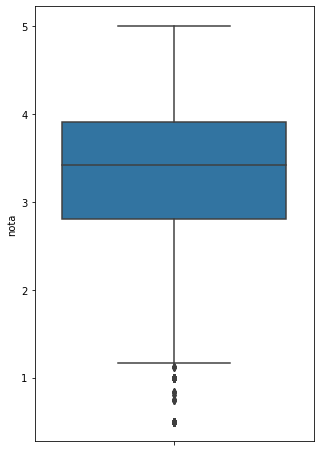

In [23]:
plt.figure(figsize=(5,8)) # Determinação de tamanho da figura (utilizado método do plt, afinal o plt é a base de sns e pandas)
sns.boxplot(y= medias_por_filmes) # Apresentação na vertical

# Aula 4

Utilização do dataset disponível no kaggle em: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [24]:
tmdb= pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Apresentação dos tipos de dados

In [25]:
tmdb.original_language.unique() # Variável categórica nominal - palavras onde não há ordenação

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Aula 5

In [26]:
tmdb.original_language.value_counts().index # Apresenta o array index da serie gerada

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ar', 'id', 'ro', 'cs', 'ta', 'te',
       'sl', 'ky', 'el', 'is', 'xx', 'hu', 'nb', 'af', 'tr', 'pl', 'no', 'vi',
       'ps'],
      dtype='object')

In [27]:
tmdb.original_language.value_counts().values # Apresenta o array da serie gerada

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

Série para dataframe

In [28]:
linguas= tmdb.original_language.value_counts().to_frame()
linguas.head()

,original_language
en,4505
fr,70
es,32
de,27
zh,27


Resetando index e renomeando colunas

In [29]:
contagem_linguas= linguas.reset_index()
contagem_linguas.columns= ['Lingua', 'Total']
contagem_linguas.head()

,Lingua,Total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='Lingua', ylabel='Total'>

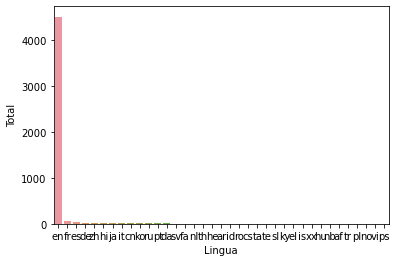

In [30]:
sns.barplot(x= 'Lingua', y= 'Total', data=contagem_linguas) #Visualização

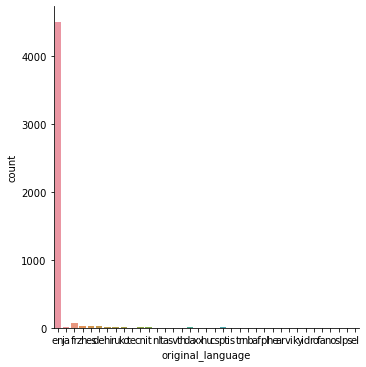

In [31]:
sns.catplot(x= 'original_language', kind= 'count', data=tmdb) 
# Sem necessidade de contar aparecimentos das linguas, resetar index ou transformar em df novamente. Porém, é necessário 
# conhecer melhor a biblioteca do SNS

# Aula 6

O gráfico precisa passar a mensagem, logo, precisamos estudar data visualization

In [32]:
total_por_lingua= tmdb.original_language.value_counts()
total_por_lingua.head()

en    4505
fr      70
es      32
de      27
zh      27
Name: original_language, dtype: int64

In [33]:
total_geral= total_por_lingua.sum()
ingles= total_por_lingua.loc['en'] # Localiza os valores para o index 'en'
resto= total_geral - ingles

In [34]:
# Criação de dicionário para organizar valores obtidos
dados= {
    'lingua': ['ingles', 'outros'],
    'total': [ingles, resto]
}

In [35]:
# transforma nosso dicionário para dataframe - afim de utilizar bibliotecas gráficas
dados= pd.DataFrame(dados) 

<AxesSubplot:xlabel='lingua', ylabel='total'>

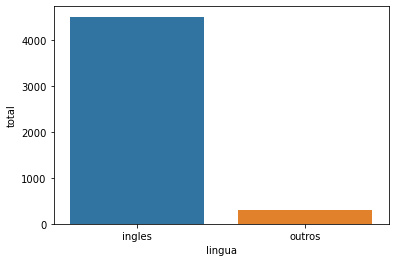

In [36]:
sns.barplot(x= 'lingua', y= 'total', data= dados)

# Aula 7

Análise das outras línguas

In [37]:
# Seleção de apenas linhas onde a lingua de origem é diferente de 'en'
dados_outros= tmdb.query('original_language != "en"') # Necessário usar dois tipos de aspas

<Figure size 1440x288 with 0 Axes>

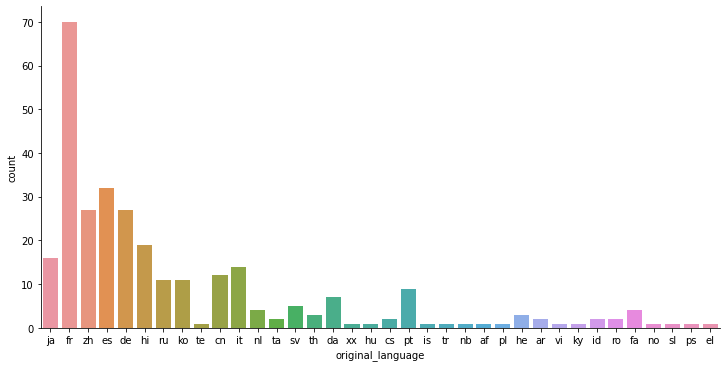

In [38]:
plt.figure(figsize=(20,4)) # Não funciona em funções de alto nível do sns
sns.catplot(x='original_language', kind= 'count', data= dados_outros, aspect= 2) # Para ajustar o tamanho é necessário chamar o parâmetro aspect

Ajustar o gráfico

In [39]:
dados_outros_aux= tmdb.query('original_language != "en"').original_language.value_counts() # Auxiliador para dar ordem crescente
dados_outros_aux

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
cs     2
ro     2
ta     2
id     2
ar     2
xx     1
ky     1
no     1
af     1
pl     1
ps     1
vi     1
nb     1
te     1
tr     1
hu     1
sl     1
is     1
el     1
Name: original_language, dtype: int64

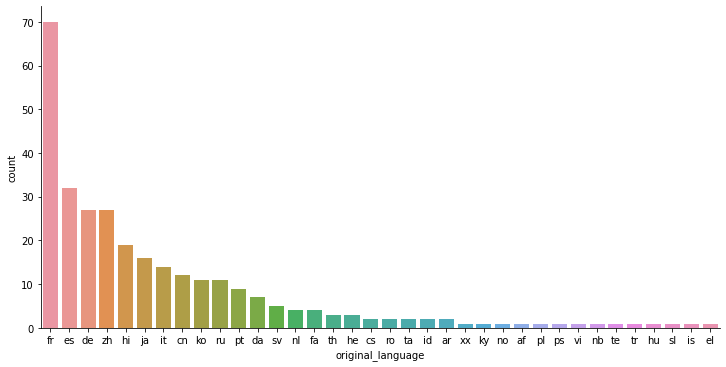

In [40]:
# Utilização do auxiliador criado acima ('coluna' index)
sns.catplot(x='original_language', kind= 'count' , data= dados_outros, order= dados_outros_aux.index , aspect= 2)

Mudança da paleta de cores

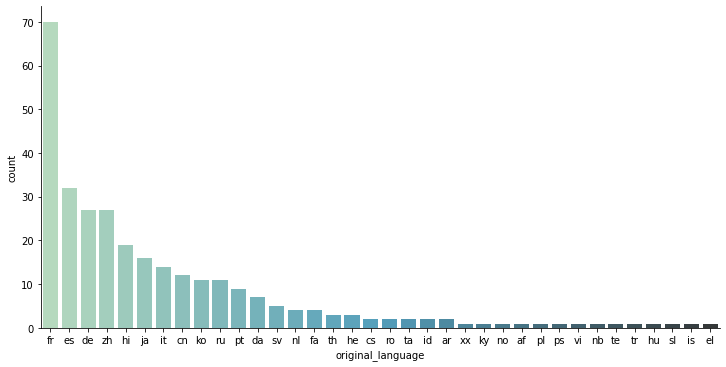

In [41]:
sns.catplot(x='original_language', kind= 'count' , data= dados_outros, order= dados_outros_aux.index , aspect= 2, palette= 'GnBu_d')

# Aula 8

In [42]:
filmes.head(3)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [43]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [44]:
toy_story = notas.query('filmeId == 1') # Notas para o filme de id= 1: ToyStory
jumanji= notas.query('filmeId == 2') # Notas para o filme de id= 2: Jumanji
old= notas.query('filmeId == 3') # Notas para o filme de id= 3: Grumpier Old Man
print(len(toy_story), len(jumanji), len(old)) # Print da quantidade de linhas - avaliações

215 110 52


Média

In [45]:
print(f'Nota média do toy story {toy_story.nota.mean():.2f}')
print(f'Nota média do jumanji {jumanji.nota.mean():.2f}')

Nota média do toy story 3.92
Nota média do jumanji 3.43


Mediana

In [46]:
print(f'Nota mediana do toy story {toy_story.nota.median():.2f}')
print(f'Nota mediana do jumanji {jumanji.nota.median():.2f}')

Nota mediana do toy story 4.00
Nota mediana do jumanji 3.50


A informação de média perde a informação de variação de notas

Melhor gráfico para observar a dispersão de valores dados é o boxplot

<AxesSubplot:ylabel='nota'>

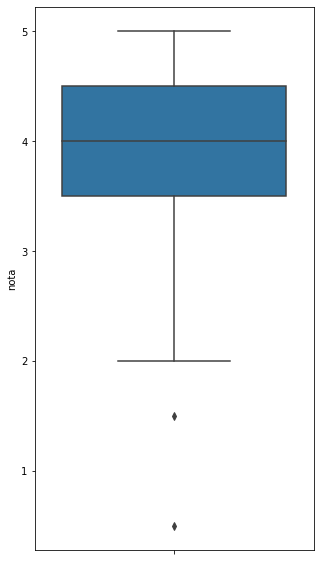

In [47]:
plt.figure(figsize=(5,10))
sns.boxplot(y= toy_story.nota)

<AxesSubplot:ylabel='nota'>

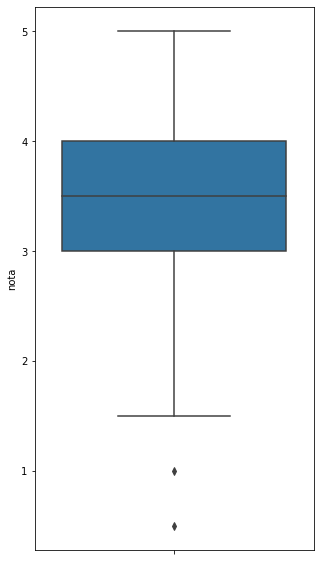

In [48]:
plt.figure(figsize=(5,10))
sns.boxplot(y= jumanji.nota)

Utilizando o boxplot do matplotlib para mostrar uma análise ao lado da outra

{'whiskers': [<matplotlib.lines.Line2D at 0x1c72c12bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c72c22f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c72c11b940>,
 'medians': [<matplotlib.lines.Line2D at 0x1c72c2ca850>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c72c327e80>,
 'means': []}

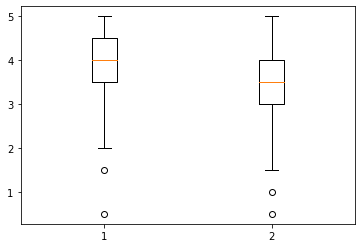

In [49]:
plt.boxplot([toy_story.nota, jumanji.nota])

Utilizando o SNS para plotar os boxplots ao lado

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

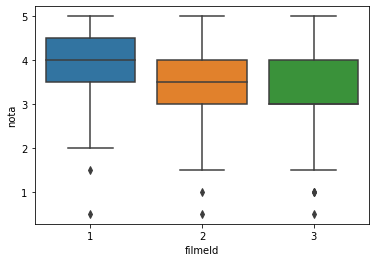

In [50]:
sns.boxplot(x= 'filmeId', y= 'nota', data= notas.query('filmeId in [1,2,3]'))

Desvio padrão - .std()

In [51]:
print(jumanji.nota.std(), toy_story.nota.std(), old.nota.std())

0.8817134921476455 0.8348591407114045 1.0548226531330251


Sites para buscar dfs: https://www.kaggle.com e https://datasetsearch.research.google.com